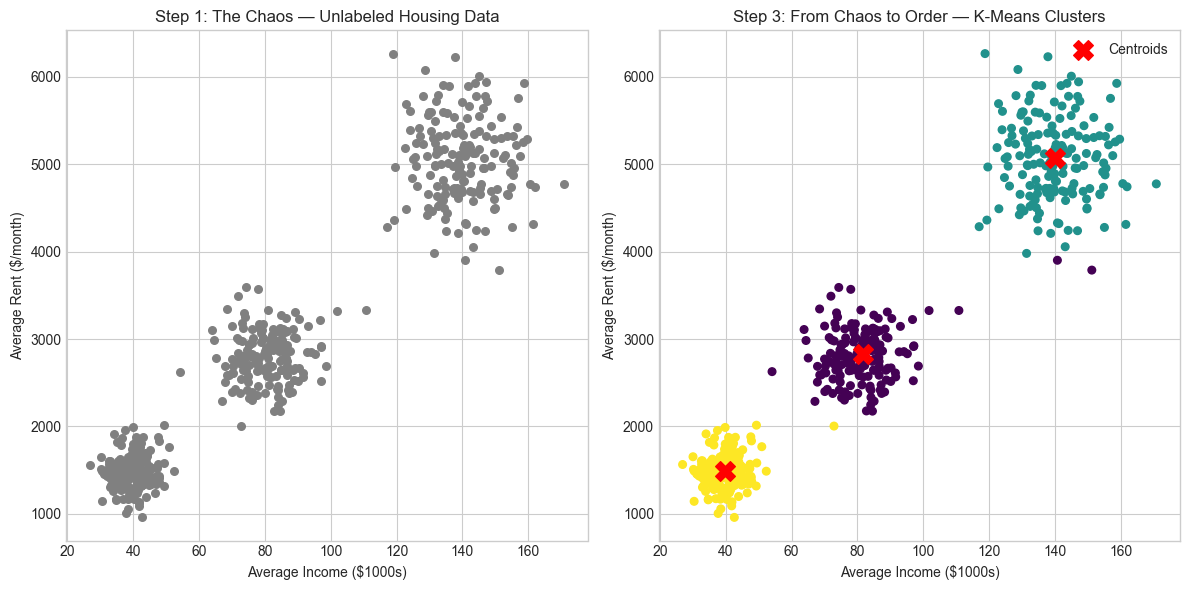

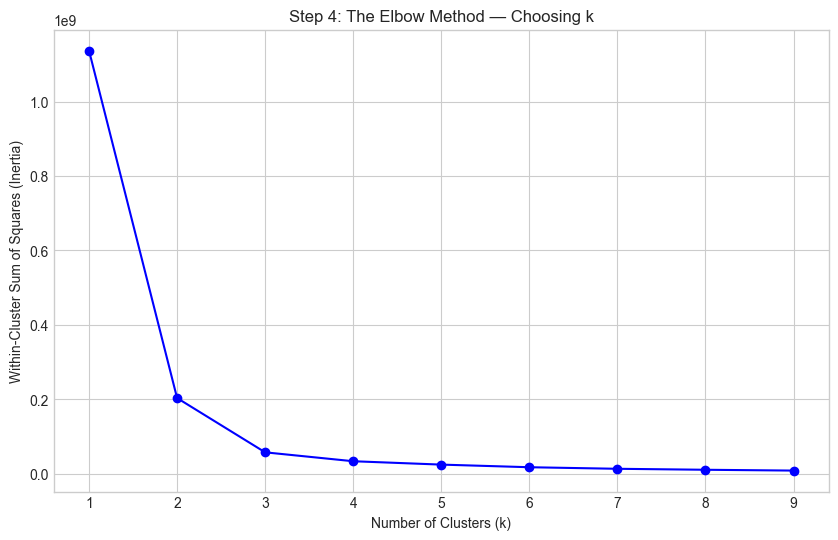

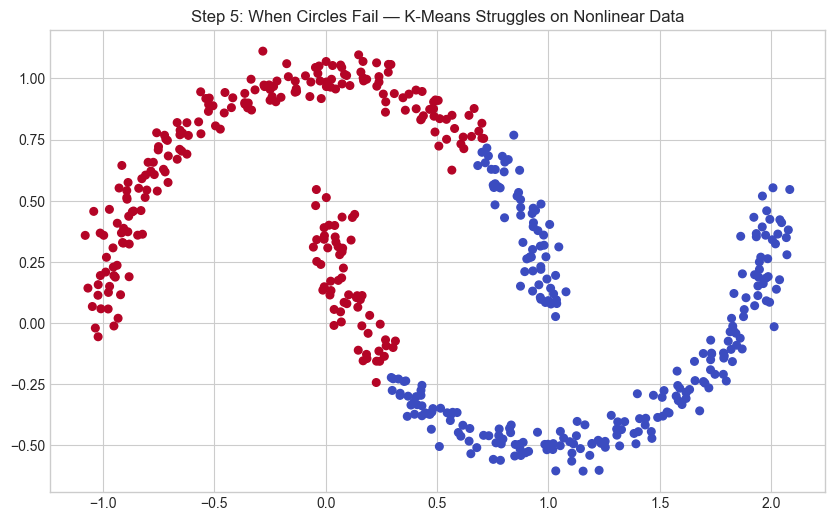

In [13]:
# notebooks/kmeans_housing.ipynb
# K-Means Clustering on Synthetic "Housing" Data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

# Consistent style and random seed
plt.style.use("seaborn-v0_8-whitegrid")
np.random.seed(42)

# Step 1: Generate synthetic "housing" data
# Feature 1: Average income ($k), Feature 2: Average rent ($/month)
n = 500
income = np.concatenate([
    np.random.normal(40, 5, n//3),  # affordable
    np.random.normal(80, 8, n//3),  # mid-tier
    np.random.normal(140, 10, n//3) # luxury
])
rent = np.concatenate([
    np.random.normal(1500, 200, n//3),
    np.random.normal(2800, 300, n//3),
    np.random.normal(5000, 500, n//3)
])

X = np.column_stack((income, rent))

# Step 2–4: Plot raw and clustered data side by side

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Left: Unlabeled data
axes[0].scatter(X[:, 0], X[:, 1], s=30, color="gray")
axes[0].set_xlabel("Average Income ($1000s)")
axes[0].set_ylabel("Average Rent ($/month)")
axes[0].set_title("Step 1: The Chaos — Unlabeled Housing Data")

# --- Right: K-Means clustered data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c="red", marker="X", s=200, label="Centroids")
axes[1].set_xlabel("Average Income ($1000s)")
axes[1].set_ylabel("Average Rent ($/month)")
axes[1].set_title("Step 3: From Chaos to Order — K-Means Clusters")
axes[1].legend()

plt.tight_layout()
plt.savefig("../charts/step2_side_by_side.png", dpi=300, bbox_inches="tight")
plt.show()


# Step 5: Elbow Method — choosing number of clusters
inertias = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, inertias, "o-", color="blue")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (Inertia)")
plt.title("Step 4: The Elbow Method — Choosing k")
plt.xticks(K)
plt.savefig("../charts/step4_elbow.png", dpi=300, bbox_inches="tight")
plt.show()

# Step 6: Where K-Means fails — nonlinear data
from sklearn.datasets import make_moons
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
labels_moons = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_moons)

plt.figure(figsize=(10,6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap="coolwarm", s=30)
plt.title("Step 5: When Circles Fail — K-Means Struggles on Nonlinear Data")
plt.savefig("../charts/step5_failure.png", dpi=300, bbox_inches="tight")
plt.show()


In [7]:
!pip install pillow ffmpeg-python


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [14]:
#Naive Bayes

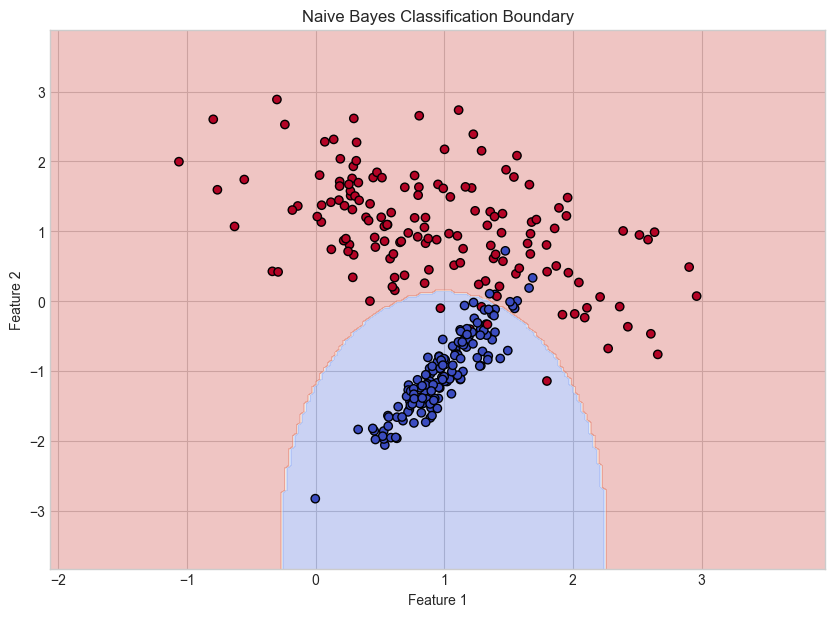

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate synthetic 2D classification data
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Predict on a grid to visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Naive Bayes Classification Boundary")
plt.show()


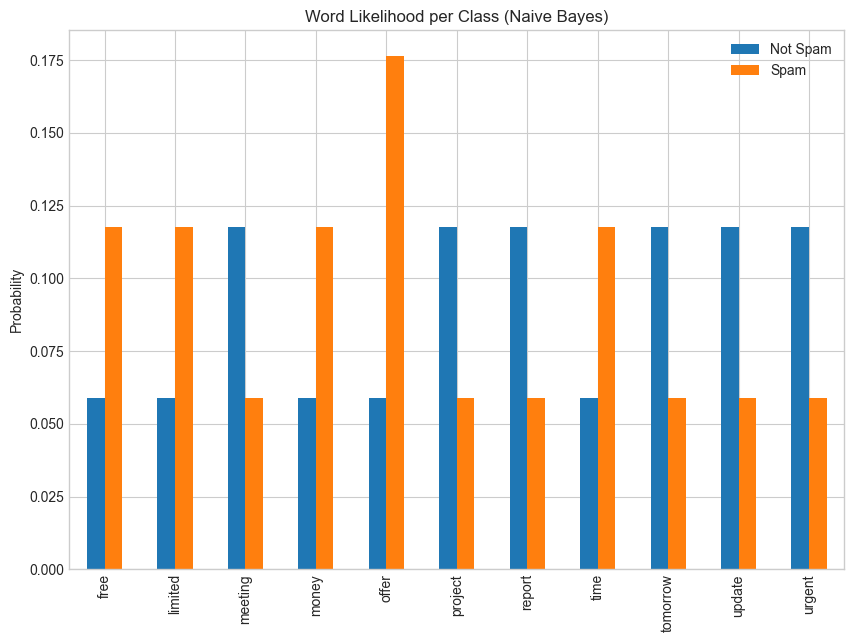

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample emails
emails = ["free money offer", "urgent meeting tomorrow", "limited time offer", "project update report"]
labels = [1, 0, 1, 0]  # 1=spam, 0=not spam

# Vectorize words
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(emails)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_text, labels)

# Plot word probabilities per class
prob_df = pd.DataFrame(nb.feature_log_prob_.T, index=vectorizer.get_feature_names_out(), columns=["Not Spam", "Spam"])
prob_df = np.exp(prob_df)  # convert log prob to actual prob

prob_df.plot(kind='bar', figsize=(10,7))
plt.title("Word Likelihood per Class (Naive Bayes)")
plt.ylabel("Probability")
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample emails
emails = ["free money offer", "urgent meeting tomorrow", "limited time offer", "project update report"]
labels = [1, 0, 1, 0]  # 1=spam, 0=not spam

# Vectorize words
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(emails)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_text, labels)

# Convert log probabilities to actual probabilities
prob_df = pd.DataFrame(nb.feature_log_prob_.T, 
                       index=vectorizer.get_feature_names_out(), 
                       columns=["Not Spam", "Spam"])
prob_df = prob_df.apply(np.exp)

# Flatten the dataframe
flattened = prob_df.reset_index().melt(id_vars="index", 
                                       var_name="Class", 
                                       value_name="Probability")
flattened.rename(columns={"index": "Word"}, inplace=True)

print(flattened)


        Word     Class  Probability
0       free  Not Spam     0.058824
1    limited  Not Spam     0.058824
2    meeting  Not Spam     0.117647
3      money  Not Spam     0.058824
4      offer  Not Spam     0.058824
5    project  Not Spam     0.117647
6     report  Not Spam     0.117647
7       time  Not Spam     0.058824
8   tomorrow  Not Spam     0.117647
9     update  Not Spam     0.117647
10    urgent  Not Spam     0.117647
11      free      Spam     0.117647
12   limited      Spam     0.117647
13   meeting      Spam     0.058824
14     money      Spam     0.117647
15     offer      Spam     0.176471
16   project      Spam     0.058824
17    report      Spam     0.058824
18      time      Spam     0.117647
19  tomorrow      Spam     0.058824
20    update      Spam     0.058824
21    urgent      Spam     0.058824


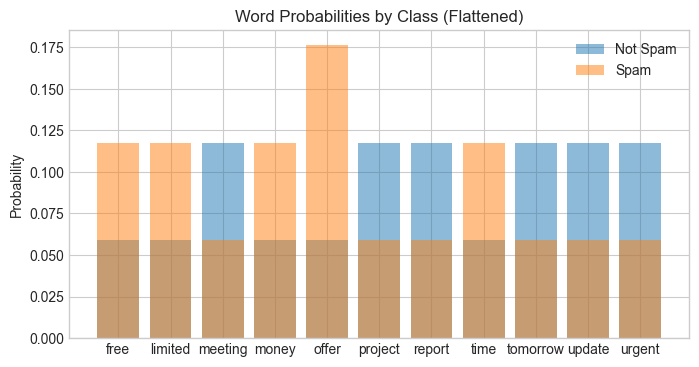

In [21]:
plt.figure(figsize=(8,4))
for cls in flattened['Class'].unique():
    subset = flattened[flattened['Class']==cls]
    plt.bar(subset['Word'], subset['Probability'], alpha=0.5, label=cls)
plt.ylabel("Probability")
plt.title("Word Probabilities by Class (Flattened)")
plt.legend()
plt.show()


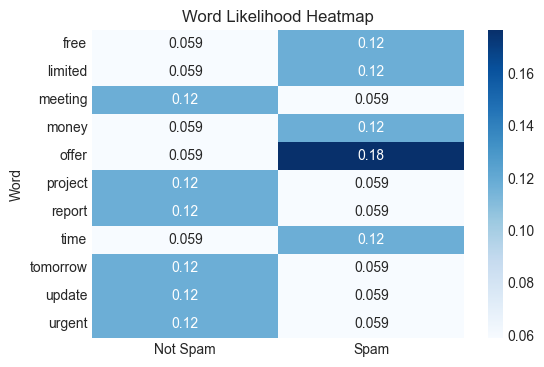

In [22]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(prob_df, annot=True, cmap="Blues")
plt.title("Word Likelihood Heatmap")
plt.ylabel("Word")
plt.show()


In [28]:
import json

data = [
    {"Algorithm": "Linear Regression", "Use Case": "Regression", "Type": "Supervised"},
    {"Algorithm": "Ridge/Lasso Regression", "Use Case": "Regression", "Type": "Supervised"},
    {"Algorithm": "Logistic Regression", "Use Case": "Classification", "Type": "Supervised"},
    {"Algorithm": "Decision Trees", "Use Case": "Classification/Regression", "Type": "Supervised"},
    {"Algorithm": "Random Forests", "Use Case": "Classification/Regression", "Type": "Supervised"},
    {"Algorithm": "GBM", "Use Case": "Classification/Regression", "Type": "Supervised"},
    {"Algorithm": "XGBoost/LightGBM/CatBoost", "Use Case": "Classification/Regression", "Type": "Supervised"},
    {"Algorithm": "SVM", "Use Case": "Classification/Regression", "Type": "Supervised"},
    {"Algorithm": "kNN", "Use Case": "Classification/Regression", "Type": "Supervised"},
    {"Algorithm": "Naive Bayes", "Use Case": "Classification", "Type": "Supervised"},
    {"Algorithm": "K-Means", "Use Case": "Clustering", "Type": "Unsupervised"},
    {"Algorithm": "Hierarchical Clustering", "Use Case": "Clustering", "Type": "Unsupervised"},
    {"Algorithm": "DBSCAN/HDBSCAN", "Use Case": "Clustering", "Type": "Unsupervised"},
    {"Algorithm": "PCA", "Use Case": "Dimensionality Reduction", "Type": "Unsupervised"},
    {"Algorithm": "t-SNE/UMAP", "Use Case": "Dimensionality Reduction/Visualization", "Type": "Unsupervised"},
    {"Algorithm": "Gaussian Mixture Models", "Use Case": "Clustering", "Type": "Unsupervised"},
    {"Algorithm": "Feedforward NN (MLP)", "Use Case": "Classification/Regression", "Type": "Deep Learning"},
    {"Algorithm": "CNN", "Use Case": "Computer Vision", "Type": "Deep Learning"},
    {"Algorithm": "RNN/LSTM/GRU", "Use Case": "Sequential Data / NLP", "Type": "Deep Learning"},
    {"Algorithm": "Transformers", "Use Case": "Sequential Data / NLP", "Type": "Deep Learning"},
]

# Build hierarchical JSON
hierarchy = {"name": "ML Algorithms", "children": []}
for t in set(d["Type"] for d in data):
    type_group = {"name": t, "children": []}
    for uc in set(d["Use Case"] for d in data if d["Type"] == t):
        uc_group = {"name": uc, "children": []}
        for alg in [d["Algorithm"] for d in data if d["Type"] == t and d["Use Case"] == uc]:
            uc_group["children"].append({"name": alg})
        type_group["children"].append(uc_group)
    hierarchy["children"].append(type_group)

# Save to data folder
with open("/Users/danielbrown/Desktop/Portfolio_Projects/ml/data/ml_algorithms_hierarchy.json", "w") as f:
    json.dump(hierarchy, f, indent=2)

print("Hierarchy JSON saved to data/ml_algorithms_hierarchy.json")


Hierarchy JSON saved to data/ml_algorithms_hierarchy.json
